In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
df=pd.read_csv("C:\\Users\\trish\\Downloads\\Zomatodataset\\zomato.csv", encoding= 'latin-1')
df
print(df.shape)
print(df.columns)
df.info()
df.describe()

(9551, 21)
Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude    

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [18]:
df_groupby_countrycode=df.groupby('Country Code').median()
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [19]:
[features for features in df.columns if df[features].isnull().sum()>0]


['Cuisines']

In [25]:
df_country= pd.read_excel("C:\\Users\\trish\\Downloads\\Zomatodataset\\Country-Code.xlsx")
df_country.head()
#merging the 2 dfs on countrycode column
merged_df=pd.merge(df, df_country, on='Country Code', how='left', indicator='True')
#check datatyes
merged_df.dtypes

Restaurant ID              int64
Restaurant Name           object
Country Code               int64
City                      object
Address                   object
Locality                  object
Locality Verbose          object
Longitude                float64
Latitude                 float64
Cuisines                  object
Average Cost for two       int64
Currency                  object
Has Table booking         object
Has Online delivery       object
Is delivering now         object
Switch to order menu      object
Price range                int64
Aggregate rating         float64
Rating color              object
Rating text               object
Votes                      int64
Country                   object
True                    category
dtype: object

In [33]:
country_names = merged_df.Country.value_counts().index
country_values= merged_df.Country.value_counts().values

([<matplotlib.patches.Wedge at 0x1e4cdfe98b0>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

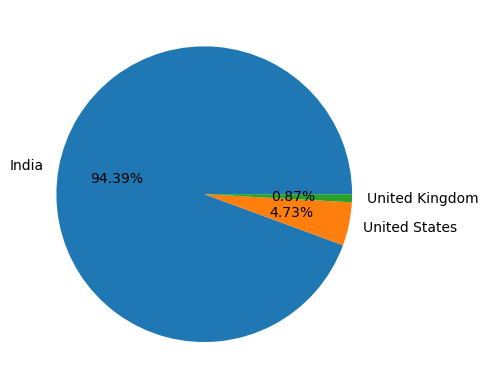

In [38]:
#pie chart for top 3 countries
plt.pie(country_values[:3], labels=country_names[:3], autopct='%1.2f%%')

In [39]:
merged_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size()

Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

In [42]:
ratings= merged_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
ratings.head(10)


,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

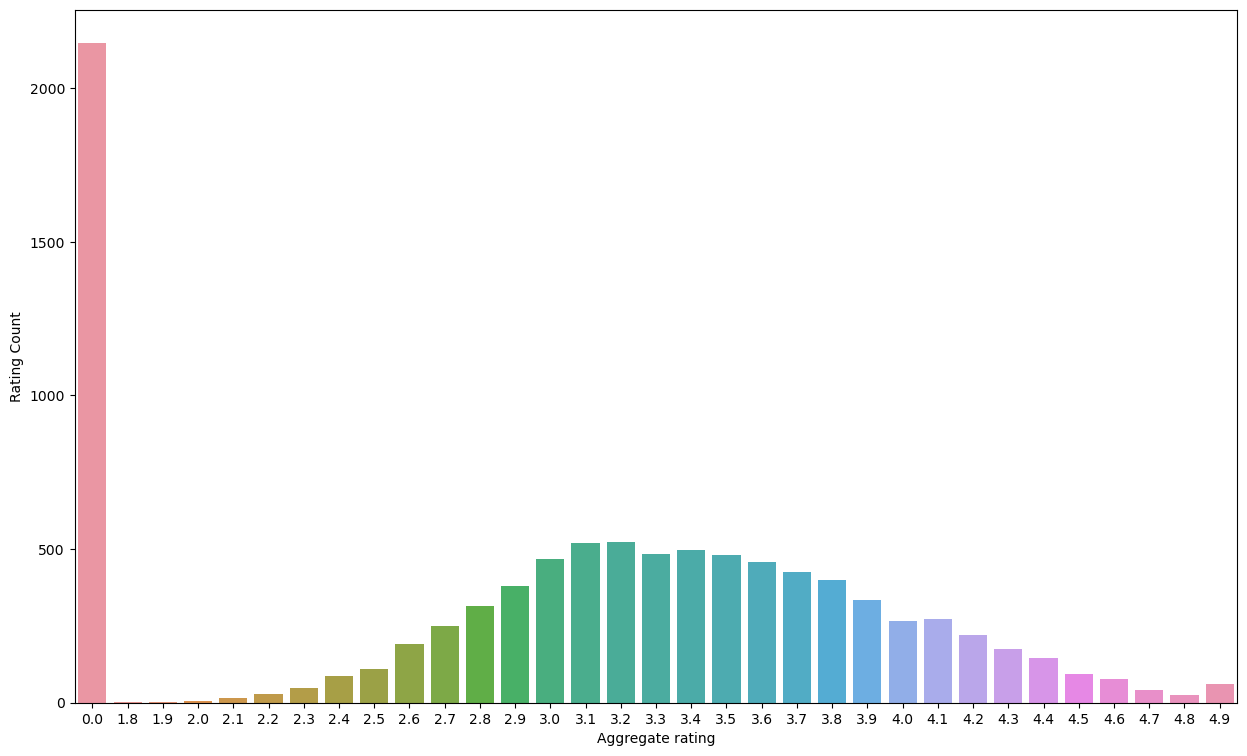

In [47]:
import matplotlib
matplotlib.rcParams['figure.figsize']= (15,9)
sns.barplot(x='Aggregate rating', y='Rating Count', data=ratings)

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

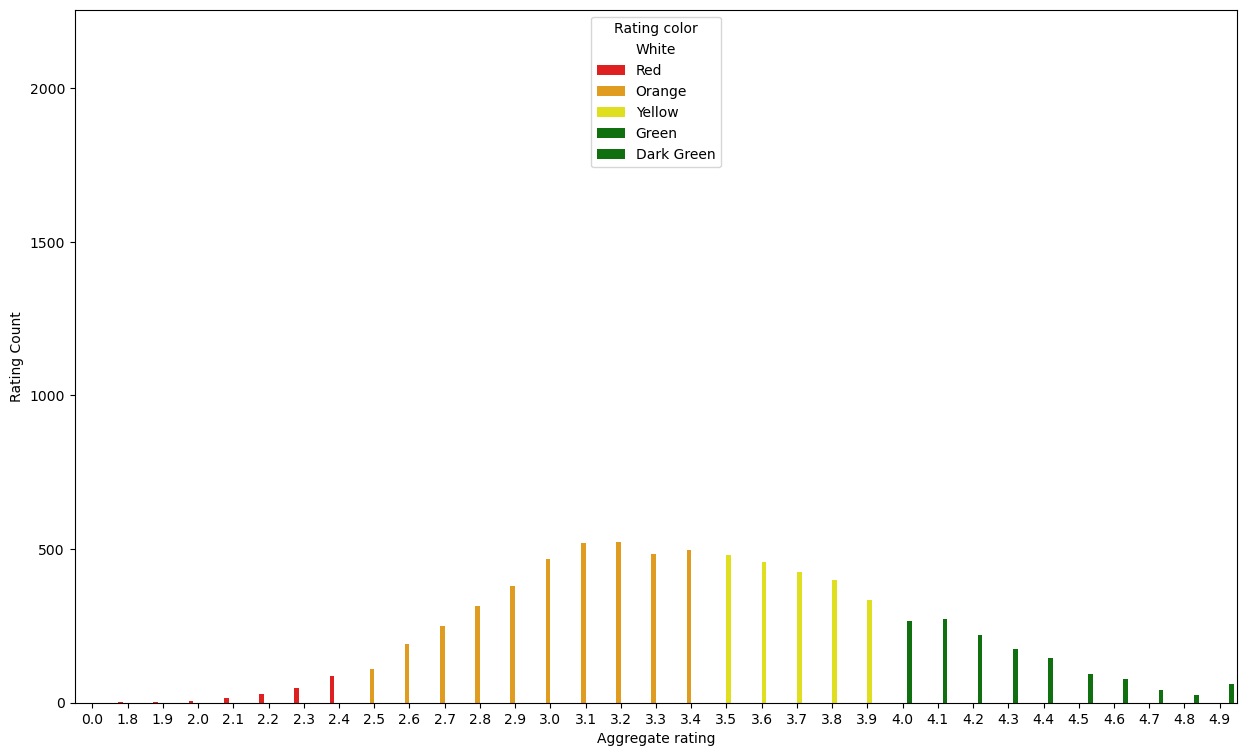

In [51]:
sns.barplot(x='Aggregate rating', y='Rating Count',hue='Rating color', data=ratings, palette=['white','red','orange','yellow','green','green'])

<AxesSubplot:>

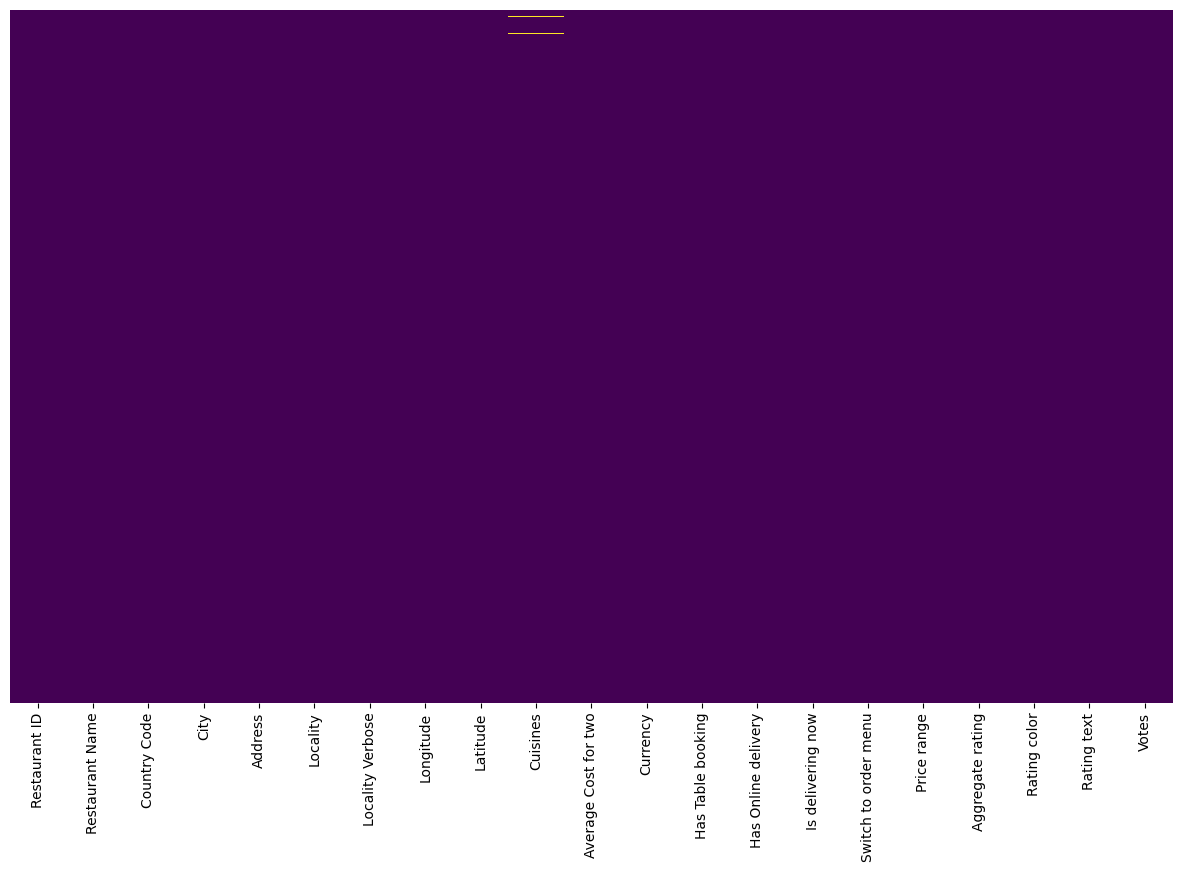

In [49]:
sns.heatmap(df.isnull(), yticklabels=False, cbar= False, cmap='viridis')

<AxesSubplot:xlabel='Rating text', ylabel='count'>

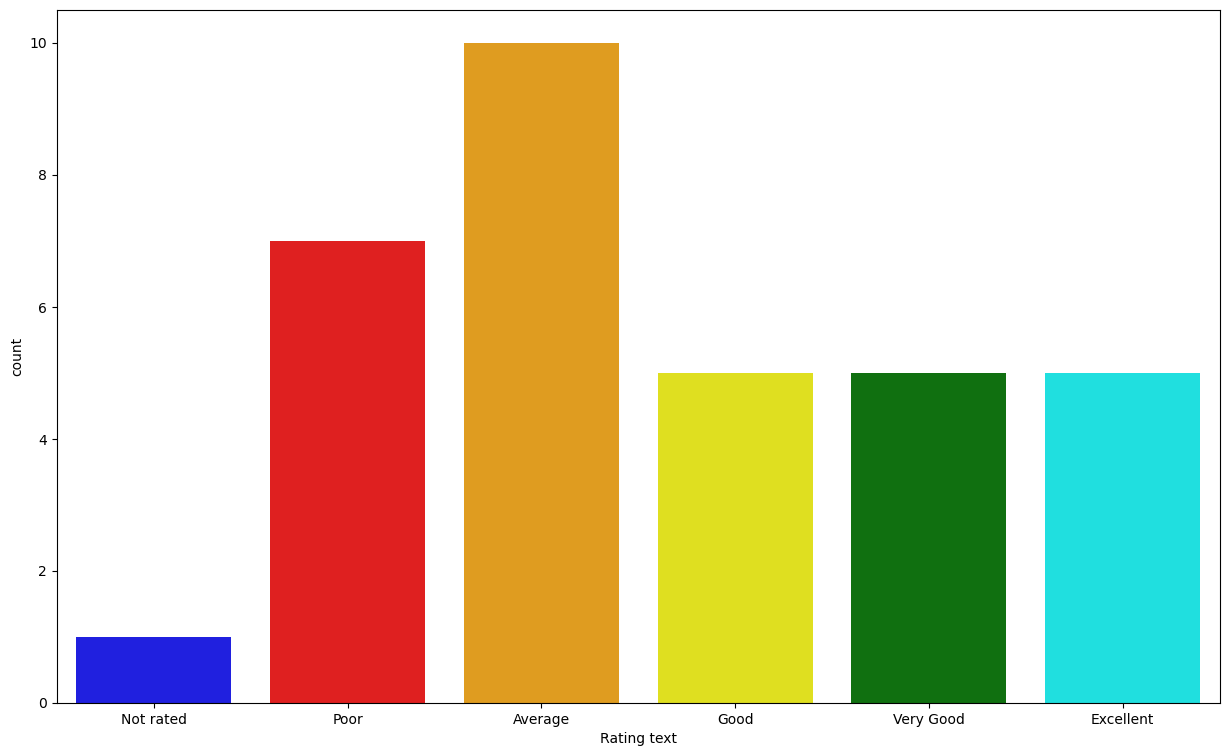

In [57]:
sns.countplot(x='Rating text' ,data= ratings, palette=['blue', 'red', 'orange', 'yellow', 'green' ,'cyan'])

In [ ]:
#country names with 0 ratings
print(merged_df.columns)
merged_df.groupby(['Aggregate rating', 'Country']).size().reset_index().sort_values(by=0, ascending=False)

#country with maximum number of 0 rating is India


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country', 'True'],
      dtype='object')


,Aggregate rating,Country,0
1,0.0,India,2139
31,3.1,India,511
37,3.2,India,510
48,3.4,India,477
43,3.3,India,472
...,...,...,...
164,4.4,Qatar,1
27,3.0,Canada,1
101,3.9,Indonesia,1
29,3.0,Singapore,1


In [95]:
merged_df[['Country', 'Currency']].groupby(['Country', 'Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [ ]:
def online_del(x):
    return x['Has Online delivery']=='Yes'
merged_df.filter(online_del(merged_df))

print(merged_df[merged_df['Has Online delivery']== 'Yes'].Country.value_counts())

#Country wise count of online deliveries
merged_df[['Has Online delivery','Country']].groupby(['Has Online delivery','Country']).size().reset_index()
#Online delivery are available in India and UAE


India    2423
UAE        28
Name: Country, dtype: int64


,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Amritsar', 'Ahmedabad', 'Lucknow', 'Guwahati',
       ...
       'Ojo Caliente', 'Montville', 'Monroe', 'Miller', 'Middleton Beach',
       'Panchkula', 'Mc Millan', 'Mayfield', 'Macedon', 'Vineland Station'],
      dtype='object', length=141)


([<matplotlib.patches.Wedge at 0x1e4d9cb2df0>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

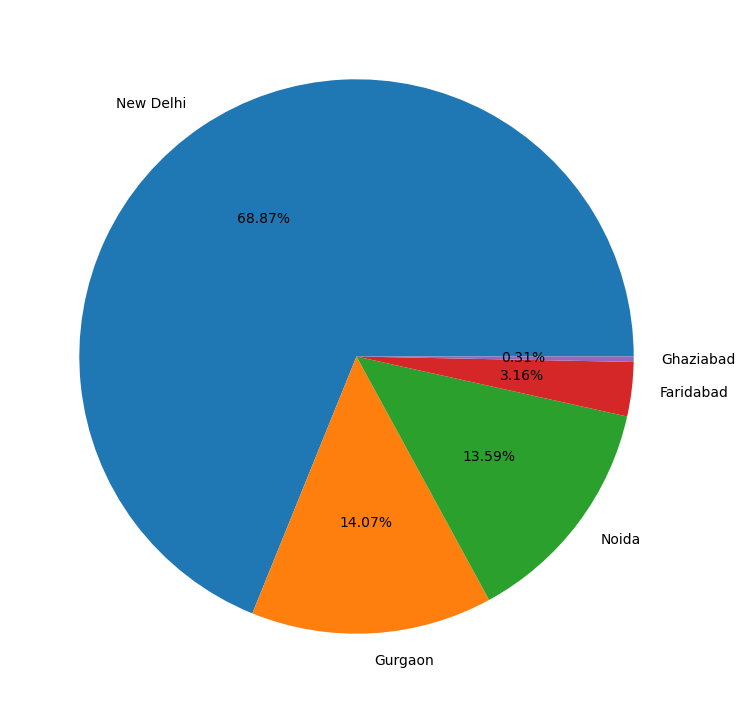

In [113]:
#Pie Chart for distribution based on cities
print(merged_df.City.value_counts().index)
city_values= merged_df.City.value_counts().values
city_labels= merged_df.City.value_counts().index

plt.pie(city_values[:5], labels=city_labels[:5], autopct='%1.2f%%')

In [121]:
#Top Cuisines
df_groupby_cuisines=merged_df.groupby('Cuisines')['Cuisines','Aggregate rating','Average Cost for two'].median()
#Top Cuisnes by rating
df_groupby_cuisines.sort_values(by='Aggregate rating', ascending=False)
#Top Cuisines by average cost for two people
df_groupby_cuisines.sort_values(by='Average Cost for two', ascending=True).head()

C:\Users\trish\AppData\Local\Temp\ipykernel_2536\3381353249.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_groupby_cuisines=merged_df.groupby('Cuisines')['Cuisines','Aggregate rating','Average Cost for two'].median()


,Aggregate rating,Average Cost for two
Cuisines,,
"Cafe, Italian, Mexican, North Indian, Continental",3.9,0.0
"Cafe, Continental, Desserts, Ice Cream, Italian, Beverages",3.9,0.0
"Desserts, Pizza, Ice Cream",3.5,0.0
"Indian, Chinese, Continental",3.6,0.0
"Italian, Fusion, Cafe",3.8,7.0
